In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [6]:
df.duplicated().sum()

0

In [7]:
for col in df.select_dtypes(include='object').columns:
    print(f"Unique values for column '{col}':")
    print(df[col].unique())
    print("-" * 20)

Unique values for column 'mainroad':
['yes' 'no']
--------------------
Unique values for column 'guestroom':
['no' 'yes']
--------------------
Unique values for column 'basement':
['no' 'yes']
--------------------
Unique values for column 'hotwaterheating':
['no' 'yes']
--------------------
Unique values for column 'airconditioning':
['yes' 'no']
--------------------
Unique values for column 'prefarea':
['yes' 'no']
--------------------
Unique values for column 'furnishingstatus':
['furnished' 'semi-furnished' 'unfurnished']
--------------------


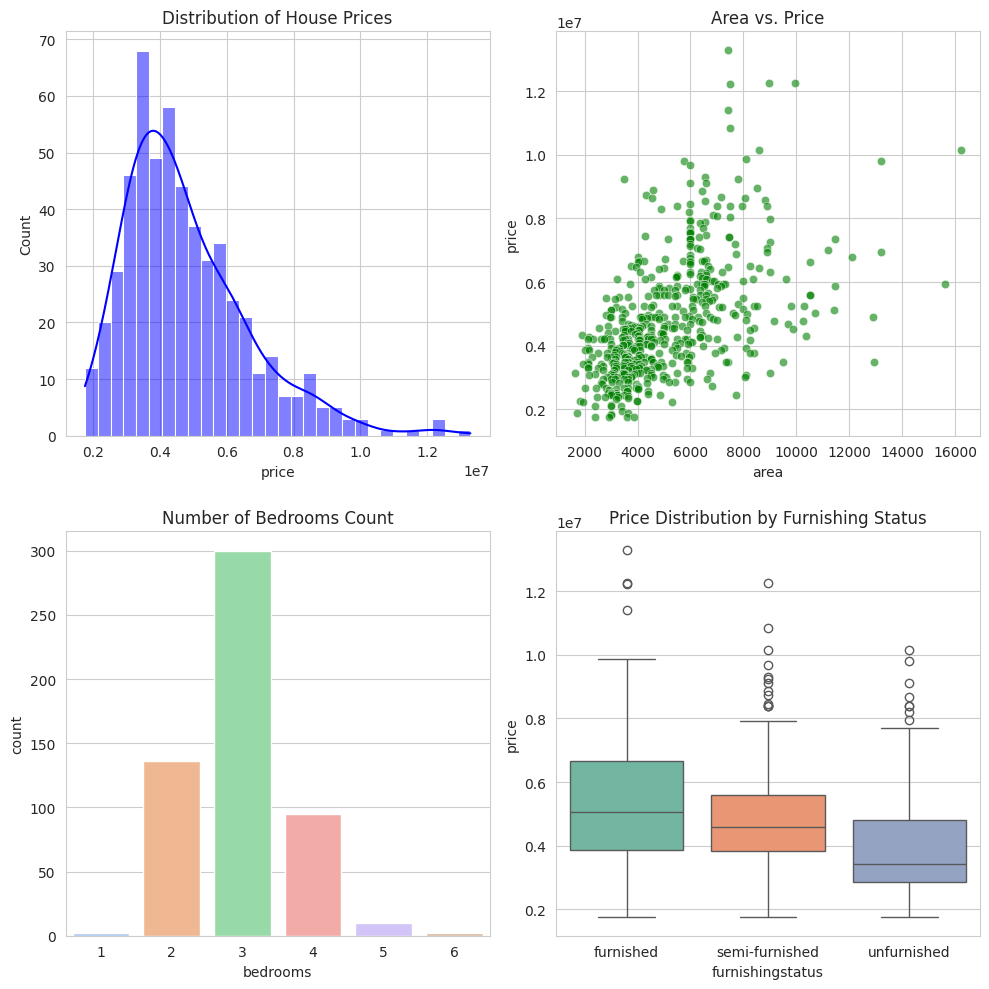

In [8]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(df["price"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of House Prices")

sns.scatterplot(x=df["area"], y=df["price"], ax=axes[0, 1], alpha=0.6, color="green")
axes[0, 1].set_title("Area vs. Price")

sns.countplot(x=df["bedrooms"], ax=axes[1, 0], palette="pastel")
axes[1, 0].set_title("Number of Bedrooms Count")

sns.boxplot(x=df["furnishingstatus"], y=df["price"], ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Price Distribution by Furnishing Status")

plt.tight_layout()
plt.show()

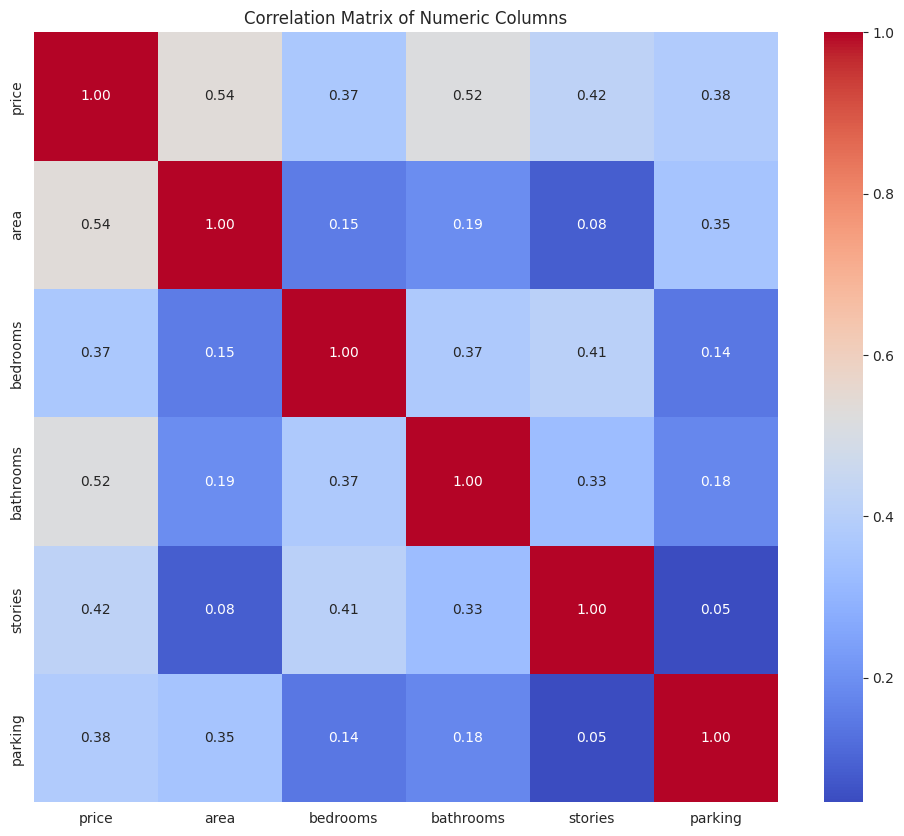

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

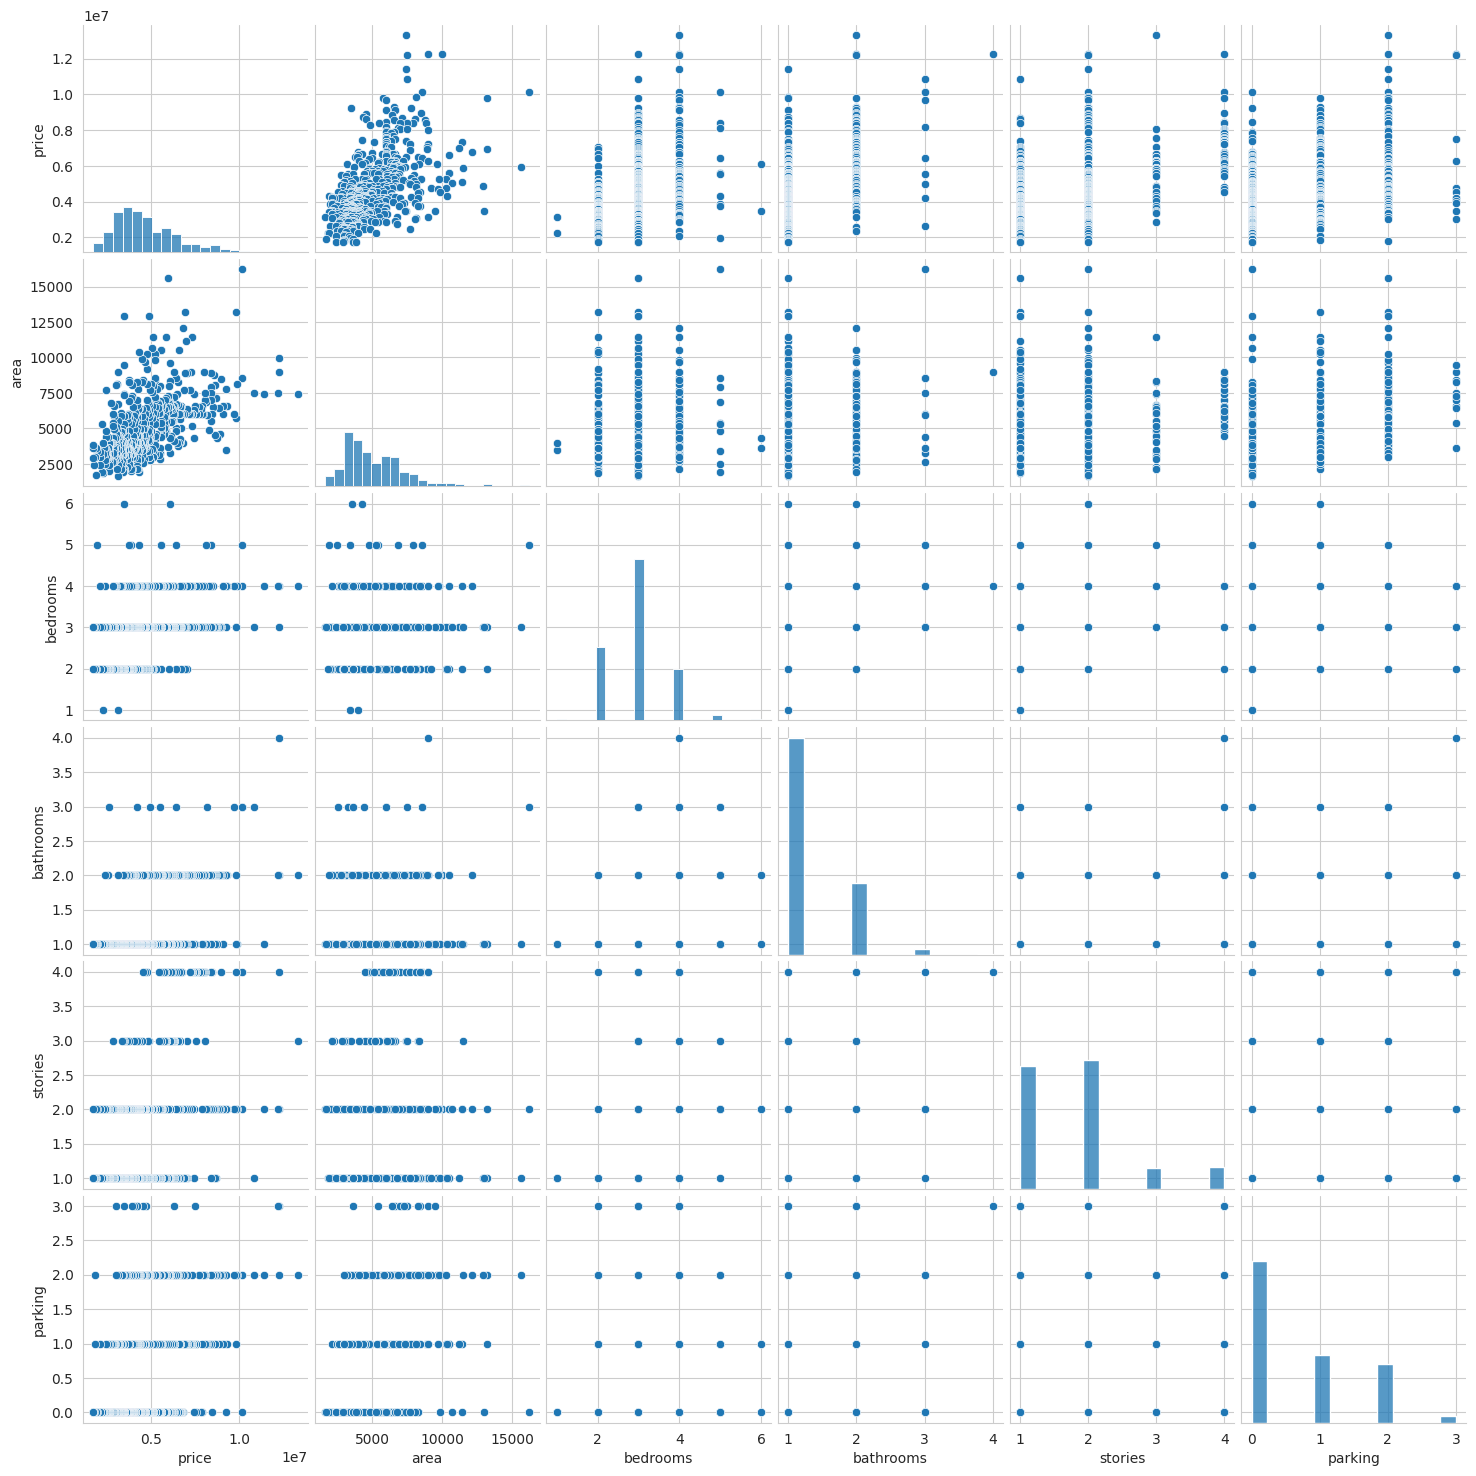

In [15]:
sns.pairplot(df)
plt.show()

In [16]:
scaler = MinMaxScaler()
cols=['price','area']
df[cols] = scaler.fit_transform(df[cols])
df[cols] = pd.DataFrame(df[cols], columns=cols)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,0.909091,0.502405,4,4,4,yes,no,no,no,yes,3,no,furnished
2,0.909091,0.571134,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,0.906061,0.402062,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,0.836364,0.396564,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [17]:
le = LabelEncoder()
oe = OneHotEncoder(sparse_output=False)
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() > 2:
        encoded_data = oe.fit_transform(df[[col]])
        new_cols = [f"{col}_{cat}" for cat in oe.categories_[0]]
        df = df.drop(columns=[col])
        df[new_cols] = encoded_data
    else:
        df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


In [19]:
X=df.drop('price',axis=1)
y=df['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
linear=LinearRegression()
linear.fit(X_train,y_train)

decision=DecisionTreeRegressor()
decision.fit(X_train,y_train)

DecisionTreeRegressor()

In [24]:
def plot_predictions(model, X_test, y_test):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title("Actual vs. Predicted Prices")
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
    plt.show()

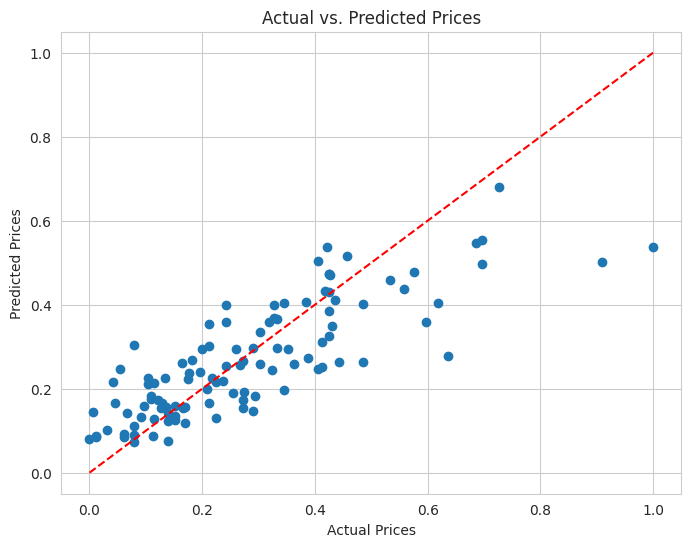

In [25]:
plot_predictions(linear,X_test,y_test)

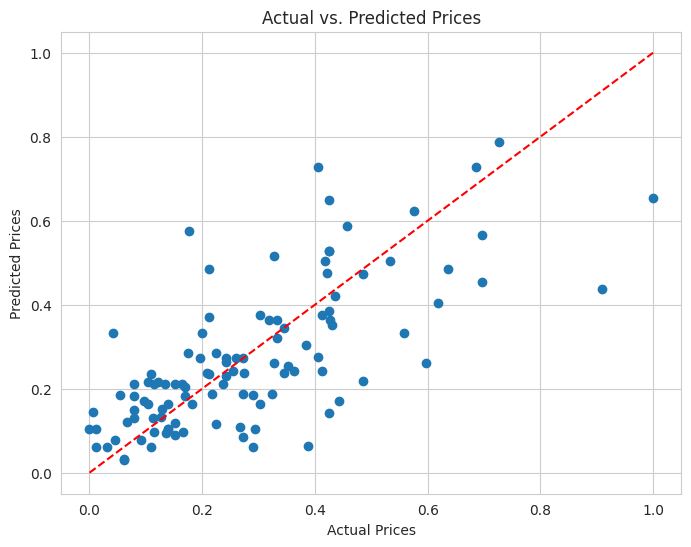

In [26]:
plot_predictions(decision,X_test,y_test)

In [28]:
def score_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print('*'*40)
    return mse, mae, r2

In [30]:
mse_linear, mae_linear, r2_linear = score_model(linear, X_test, y_test)
mse_decision, mae_decision, r2_decision = score_model(decision, X_test, y_test)

Mean Squared Error: 0.01
Mean Absolute Error: 0.08
R-squared: 0.65
****************************************
Mean Squared Error: 0.02
Mean Absolute Error: 0.10
R-squared: 0.48
****************************************


In [31]:
def crossval(model,X,y,k,scorings):
  cv_scores=cross_val_score(model, X, y, cv=k, scoring=scorings)
  cv_rmse_scores = np.sqrt(-cv_scores)
  print("Cross-Validation RMSE Scores:", cv_rmse_scores)
  print("Mean RMSE:", cv_rmse_scores.mean())
  print("Standard Deviation of RMSE:", cv_rmse_scores.std())
  print('*'*40)

In [32]:
crossval(linear,X,y,5,'neg_mean_squared_error')
crossval(decision,X,y,5,'neg_mean_squared_error')

Cross-Validation RMSE Scores: [0.22674755 0.08448273 0.08092881 0.08070931 0.08865828]
Mean RMSE: 0.11230533536687737
Standard Deviation of RMSE: 0.05729414528460435
****************************************
Cross-Validation RMSE Scores: [0.26348096 0.15374708 0.13505739 0.11671481 0.14349395]
Mean RMSE: 0.1624988358582657
Standard Deviation of RMSE: 0.05193145077366828
****************************************


In [34]:
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]  # Replace 'normalize' with 'positive' if needed
}

param_grid_decision = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_linear = GridSearchCV(linear, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_search_linear.fit(X_train, y_train)
print("Linear Regression:", grid_search_linear.best_params_)
print("Linear Regression:", grid_search_linear.best_score_)
print('*'*90)
grid_search_decision = GridSearchCV(decision, param_grid_decision, cv=5, scoring='neg_mean_squared_error')
grid_search_decision.fit(X_train, y_train)
print("Decision Tree Regression:", grid_search_decision.best_params_)
print("Decision Tree Regression:", grid_search_decision.best_score_)

Linear Regression: {'fit_intercept': False, 'positive': False}
Linear Regression: -0.007965666338654781
******************************************************************************************
Decision Tree Regression: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree Regression: -0.011663975056848954


In [35]:
print(f'\nAfter GridSearchCV and Cross Validation')
mse_linear_tuned, mae_linear_tuned, r2_linear_tuned = score_model(grid_search_linear.best_estimator_, X_test, y_test)
mse_decision_tuned, mae_decision_tuned, r2_decision_tuned = score_model(grid_search_decision.best_estimator_, X_test, y_test)


After GridSearchCV and Cross Validation
Mean Squared Error: 0.01
Mean Absolute Error: 0.08
R-squared: 0.65
****************************************
Mean Squared Error: 0.02
Mean Absolute Error: 0.11
R-squared: 0.46
****************************************
